In [1]:
import numpy as np
import matplotlib.pyplot as plt
from data_utils import *
import cifar10_DNN

Using TensorFlow backend.


cifar10_DNN모듈을 사용한다

원래 이미지 데이터

In [2]:
(X_train_origin, Y_train_origin), (X_test_origin, Y_test_origin) = cifar10_DNN.datasets.cifar10.load_data()

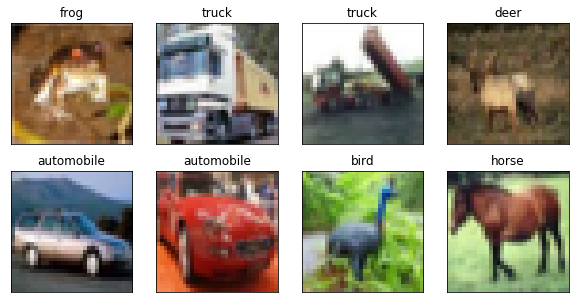

In [3]:
show_images(X_train_origin, Y_train_origin, 8)

pre-processing된 데이터 load

In [4]:
(X_train, Y_train), (X_test, Y_test) = cifar_DNN_data_load(cifar10_DNN.datasets.cifar10, std_data = True)

Data type changed to float32, label type changed to categorical
Standardization Data


In [5]:
cifar_model = cifar10_DNN.CifarDNN(img_shape = X_train.shape[1], class_num = Y_train.shape[1],
                                  do_drop = True)

모델 펼처보기

In [6]:
cifar_model.show_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
HiddenLayer1 (Dense)         (None, 32)                98336     
_________________________________________________________________
activation_1 (Activation)    (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
HiddenLayer2 (Dense)         (None, 64)                2112      
_________________________________________________________________
activation_2 (Activation)    (None, 64)                0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
__________

In [7]:
history_train = cifar_model.train(X_train, Y_train, epoch = 200, batch_size = 128)

#  model evaluate
result = cifar_model.show_eval(X_test, Y_test, 32)
print('Test Loss : ', result[0])
print('Test Accuracy : ', result[1]*100, '%')

Train on 40000 samples, validate on 10000 samples
Epoch 1/200
40000/40000 [==============================] - 2s 57us/step - loss: 1.9850 - acc: 0.2913 - val_loss: 1.7590 - val_acc: 0.3750

Epoch 00001: val_loss improved from inf to 1.75903, saving model to ./save_model/model/2019-05-06_16h37m18s/01-1.7590-0.2913.hd5
Epoch 2/200
40000/40000 [==============================] - 1s 34us/step - loss: 1.7983 - acc: 0.3558 - val_loss: 1.6767 - val_acc: 0.4083

Epoch 00002: val_loss improved from 1.75903 to 1.67671, saving model to ./save_model/model/2019-05-06_16h37m18s/02-1.6767-0.3558.hd5
Epoch 3/200
40000/40000 [==============================] - 1s 35us/step - loss: 1.7293 - acc: 0.3811 - val_loss: 1.6604 - val_acc: 0.4187

Epoch 00003: val_loss improved from 1.67671 to 1.66039, saving model to ./save_model/model/2019-05-06_16h37m18s/03-1.6604-0.3811.hd5
Epoch 4/200
40000/40000 [==============================] - 1s 35us/step - loss: 1.6905 - acc: 0.3957 - val_loss: 1.6126 - val_acc: 0.4329


40000/40000 [==============================] - 1s 32us/step - loss: 1.4144 - acc: 0.4920 - val_loss: 1.4722 - val_acc: 0.4788

Epoch 00036: val_loss did not improve from 1.46972
Epoch 37/200
40000/40000 [==============================] - 1s 34us/step - loss: 1.4075 - acc: 0.4970 - val_loss: 1.4796 - val_acc: 0.4761

Epoch 00037: val_loss did not improve from 1.46972
Epoch 38/200
40000/40000 [==============================] - 1s 34us/step - loss: 1.4022 - acc: 0.4970 - val_loss: 1.4776 - val_acc: 0.4766

Epoch 00038: val_loss did not improve from 1.46972
Epoch 39/200
40000/40000 [==============================] - 1s 32us/step - loss: 1.4050 - acc: 0.4932 - val_loss: 1.4680 - val_acc: 0.4785

Epoch 00039: val_loss improved from 1.46972 to 1.46798, saving model to ./save_model/model/2019-05-06_16h37m18s/39-1.4680-0.4931.hd5
Epoch 40/200
40000/40000 [==============================] - 1s 32us/step - loss: 1.4020 - acc: 0.4936 - val_loss: 1.4707 - val_acc: 0.4782

Epoch 00040: val_loss did n


Epoch 00077: val_loss did not improve from 1.46628
Epoch 78/200
40000/40000 [==============================] - 1s 34us/step - loss: 1.3158 - acc: 0.5265 - val_loss: 1.4927 - val_acc: 0.4715

Epoch 00078: val_loss did not improve from 1.46628
Epoch 79/200
40000/40000 [==============================] - 1s 33us/step - loss: 1.3230 - acc: 0.5230 - val_loss: 1.4779 - val_acc: 0.4728

Epoch 00079: val_loss did not improve from 1.46628
Epoch 80/200
40000/40000 [==============================] - 1s 35us/step - loss: 1.3228 - acc: 0.5235 - val_loss: 1.4860 - val_acc: 0.4741

Epoch 00080: val_loss did not improve from 1.46628
Epoch 81/200
40000/40000 [==============================] - 1s 34us/step - loss: 1.3203 - acc: 0.5235 - val_loss: 1.4936 - val_acc: 0.4692

Epoch 00081: val_loss did not improve from 1.46628
Epoch 82/200
40000/40000 [==============================] - 1s 33us/step - loss: 1.3104 - acc: 0.5290 - val_loss: 1.5069 - val_acc: 0.4648

Epoch 00082: val_loss did not improve from 1


Epoch 00120: val_loss did not improve from 1.46628
Epoch 121/200
40000/40000 [==============================] - 1s 33us/step - loss: 1.2682 - acc: 0.5427 - val_loss: 1.5142 - val_acc: 0.4632

Epoch 00121: val_loss did not improve from 1.46628
Epoch 122/200
40000/40000 [==============================] - 1s 33us/step - loss: 1.2703 - acc: 0.5441 - val_loss: 1.5170 - val_acc: 0.4630

Epoch 00122: val_loss did not improve from 1.46628
Epoch 123/200
40000/40000 [==============================] - 1s 33us/step - loss: 1.2645 - acc: 0.5439 - val_loss: 1.5051 - val_acc: 0.4700

Epoch 00123: val_loss did not improve from 1.46628
Epoch 124/200
40000/40000 [==============================] - 1s 33us/step - loss: 1.2649 - acc: 0.5466 - val_loss: 1.5220 - val_acc: 0.4663

Epoch 00124: val_loss did not improve from 1.46628
Epoch 125/200
40000/40000 [==============================] - 1s 33us/step - loss: 1.2702 - acc: 0.5429 - val_loss: 1.5178 - val_acc: 0.4660

Epoch 00125: val_loss did not improve f

40000/40000 [==============================] - 1s 33us/step - loss: 1.2260 - acc: 0.5602 - val_loss: 1.5494 - val_acc: 0.4547

Epoch 00163: val_loss did not improve from 1.46628
Epoch 164/200
40000/40000 [==============================] - 1s 32us/step - loss: 1.2212 - acc: 0.5611 - val_loss: 1.5485 - val_acc: 0.4588

Epoch 00164: val_loss did not improve from 1.46628
Epoch 165/200
40000/40000 [==============================] - 1s 32us/step - loss: 1.2292 - acc: 0.5558 - val_loss: 1.5599 - val_acc: 0.4543

Epoch 00165: val_loss did not improve from 1.46628
Epoch 166/200
40000/40000 [==============================] - 1s 33us/step - loss: 1.2206 - acc: 0.5585 - val_loss: 1.5560 - val_acc: 0.4539

Epoch 00166: val_loss did not improve from 1.46628
Epoch 167/200
40000/40000 [==============================] - 1s 33us/step - loss: 1.2275 - acc: 0.5594 - val_loss: 1.5573 - val_acc: 0.4569

Epoch 00167: val_loss did not improve from 1.46628
Epoch 168/200
40000/40000 [===========================

In [8]:
prediction = cifar_model.predict(X_test)

In [9]:
print(Y_test_origin[:8])
print(prediction[:8])

[[3]
 [8]
 [8]
 [0]
 [6]
 [6]
 [1]
 [6]]
[3 1 8 8 4 6 5 6]


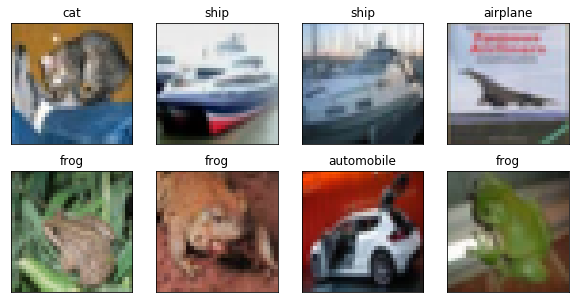

In [10]:
show_images(X_test_origin, Y_test_origin, 8)

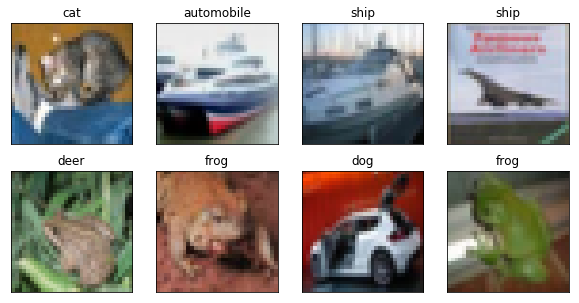

In [11]:
show_images(X_test_origin, prediction, 8)

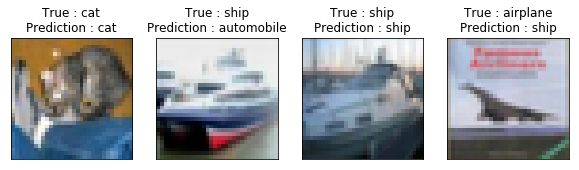

In [12]:
show_images_compare(X_test_origin, Y_test_origin, prediction)

In [13]:
result = cifar_model.show_eval(X_test, Y_test, 32)

10000/10000 [==============================] - 0s 31us/step
Test Loss :  1.558912306022644
Test Accuracy :  0.4575


In [14]:
print('predict class : ',cifar_model.model.predict(X_test[:3]))

predict class :  [[2.7512552e-02 8.5256537e-03 5.9032466e-02 3.7896693e-01 1.0086195e-02
  3.5599557e-01 7.4583463e-02 6.0810368e-03 7.7961601e-02 1.2545028e-03]
 [8.3110975e-03 6.5023595e-01 1.6102480e-05 1.0133749e-06 1.8785630e-06
  3.7798301e-08 1.3283432e-06 1.4271680e-07 1.3869013e-01 2.0274229e-01]
 [1.6726665e-01 6.9445573e-02 1.0874945e-01 1.3139964e-02 1.6331520e-02
  5.8288500e-03 1.8102722e-03 1.8288290e-02 4.3762764e-01 1.6151185e-01]]


In [15]:
print('predict class : ',cifar_model.model.predict_classes(X_test[:3]))

predict class :  [3 1 8]


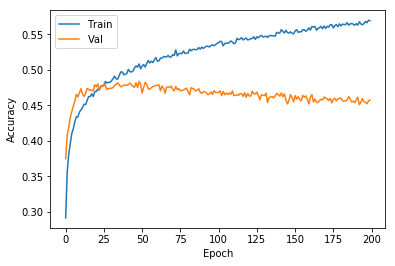

In [16]:
cifar10_DNN.plot_acc(history_train)

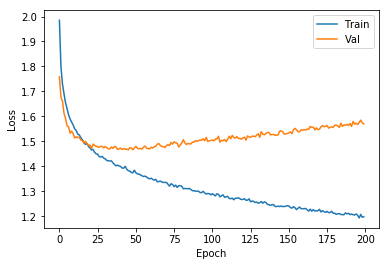

In [17]:
cifar10_DNN.plot_loss(history_train)

In [18]:
history_train.history['acc'][-1]

0.5692

In [19]:
prediction = cifar_model.model.predict(X_test)
Y_prediction = np.argmax(prediction, axis=1)

# label shape is digit
print(confusion_mat(Y_test_origin, Y_prediction))

[[501  35  47  60  43  14  24  33 181  62]
 [ 45 564  20  41  14  20  17  14  97 168]
 [ 77  24 269 121 192  66 118  69  35  29]
 [ 29  28  80 371  79 144 149  41  39  40]
 [ 42   7 100  99 448  54 104  89  48   9]
 [ 11  11  78 303  94 295  95  56  35  22]
 [  6  24  54 135 172  46 489  31  22  21]
 [ 39  26  49 107 106  76  42 467  29  59]
 [ 94  55  16  49  20  14   7   4 688  53]
 [ 50 185   8  53  12  15  27  46 121 483]]


In [20]:
print(confusion_report(Y_test_origin, Y_prediction))

              precision    recall  f1-score   support

           0       0.56      0.50      0.53      1000
           1       0.59      0.56      0.58      1000
           2       0.37      0.27      0.31      1000
           3       0.28      0.37      0.32      1000
           4       0.38      0.45      0.41      1000
           5       0.40      0.29      0.34      1000
           6       0.46      0.49      0.47      1000
           7       0.55      0.47      0.50      1000
           8       0.53      0.69      0.60      1000
           9       0.51      0.48      0.50      1000

   micro avg       0.46      0.46      0.46     10000
   macro avg       0.46      0.46      0.46     10000
weighted avg       0.46      0.46      0.46     10000



In [21]:
np.unique(Y_test_origin)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])